<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/temporary_immunity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

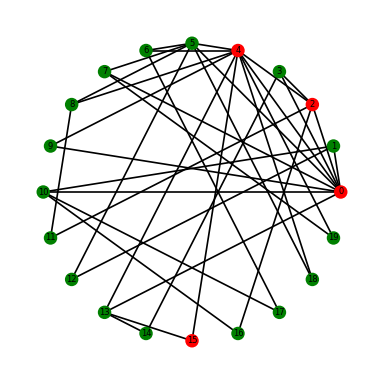

In [ ]:
from random import random
from random import sample
import networkx as nx
import matplotlib.pyplot as plt
n = 20 # how many people (they will arrive one by one)
conn = 2 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn)
L = nx.circular_layout(G)

perc = 0.2 # what percentage will be initially infected
sickPeople = round(perc * n)

infected = set(sample(list(G.nodes), sickPeople))
recovered = set()
I = 'red'
S = 'green'
R = 'gray'

# coloring
Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
Es = [ I if (v, u) in spread else 'green' for v, u in G.edges ]
fig = plt.figure(1, figsize = (3, 3), dpi =  120)
nx.draw(G, L, node_color = Vs, node_size = 50)
l = nx.draw_networkx_labels(G, pos = L, font_size = 5)

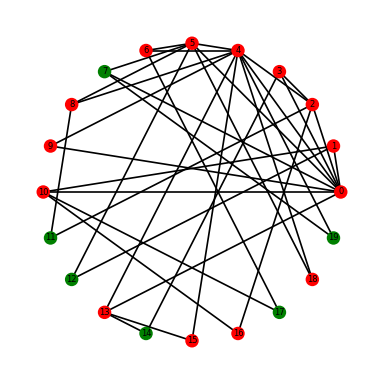

In [ ]:
contagion = 0.5 # probability of contagion

newlyInfected = set()
spread = set()
for v in G.nodes:
  if v in infected:
    for u in G.neighbors(v): # set of nodes with which this one has a connection in the model
      if u not in infected and u not in recovered:
        if random() < contagion:
          spread.add((v, u))
          spread.add((u, v))
          newlyInfected.add(u)
len(spread)

infected.update(newlyInfected)

fig = plt.figure(1, figsize = (3, 3), dpi =  120)
# coloring
Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
Es = [ I if (v, u) in spread else 'green' for v, u in G.edges ]
nx.draw(G, L, node_color = Vs, node_size = 50)
l = nx.draw_networkx_labels(G, pos = L, font_size = 5)

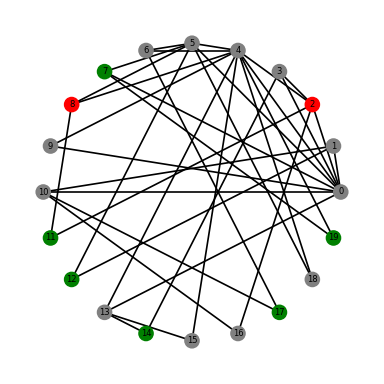

In [ ]:
recovery = 0.8 # probability of recovery
recovered = set()
for v in infected:
  if random() < recovery:
    recovered.add(v)
infected -= recovered
recovered

Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
Es = [ I if (v, u) in spread else 'yellow' for v, u in G.edges ]
fig = plt.figure(1, figsize = (3, 3), dpi =  120)
nx.draw(G, L, node_color = Vs, node_size = 70)
l = nx.draw_networkx_labels(G, pos = L, font_size = 5)

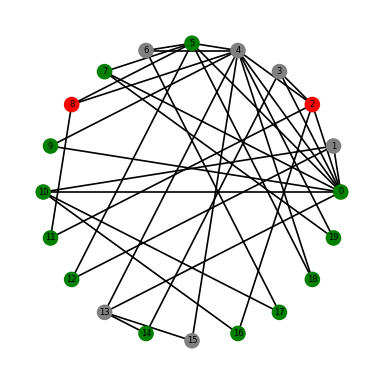

In [ ]:
lost = set()
ti = 0.5 # temp immunity
for v in recovered:
  if random() < ti:
    lost.add(v)

for v in lost:
  recovered.remove(v)

Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
Es = [ I if (v, u) in spread else 'yellow' for v, u in G.edges ]
fig = plt.figure(1, figsize = (3, 3), dpi =  120)
nx.draw(G, L, node_color = Vs, node_size = 70)
l = nx.draw_networkx_labels(G, pos = L, font_size = 5)